In [90]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Dataset

In [91]:
np.random.seed(666)
x=np.random.uniform(-3,3,size=100)
X=x.reshape(-1,1)
y=0.5*x**2+x+  2+np.random.normal(0,1,size=100)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10)

## polynomial regression

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
def polynomial_regression(X):
    X2=np.hstack([X,X**2])
    lin_reg=LinearRegression()
    lin_reg.fit(X2,y)
    y_predict=lin_reg.predict(X2)
    return y_predict
def PolynomialRegression(degree):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('scalar',StandardScaler()),
        ('lin_reg',LinearRegression())
    ])

## Eva

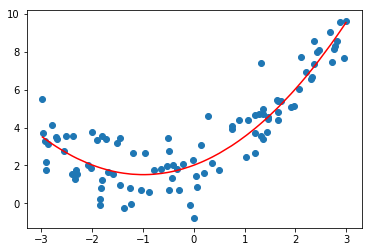

In [93]:
poly_reg=PolynomialRegression(degree=2)
poly_reg.fit(X,y)
y_predict=poly_reg.predict(X)
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],'r')

## overfitting & underfitting (泛化能力)

In [94]:
from sklearn.metrics import mean_squared_error

In [95]:
def plot_learning_curve(algo,X_train,X_test,y_train,y_test):
    train_score=[]
    test_score=[]
    for i in range(1,len(X_train)+1):
        algo.fit(X_train[:i],y_train[:i])
        y_train_predict=algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i],y_train_predict))
        y_test_predict=algo.predict(X_test)
        test_score.append(mean_squared_error(y_test,y_test_predict))
    plt.plot([i for i in range(1,len(X_train)+1)],train_score,label='train')
    plt.plot([i for i in range(1,len(X_train)+1)],test_score,label='test')
    plt.legend()
    plt.axis([0,len(X_train)+1,0,10])
    plt.show()

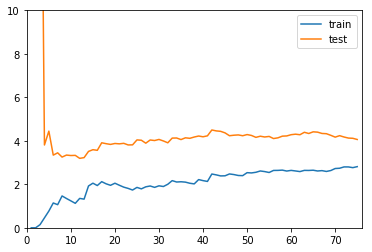

In [96]:
plot_learning_curve(LinearRegression(),X_train,X_test,y_train,y_test)

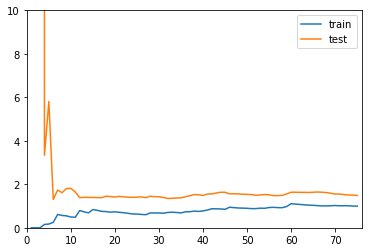

In [97]:
poly2_reg=PolynomialRegression(degree=2)
plot_learning_curve(poly2_reg,X_train,X_test,y_train,y_test)

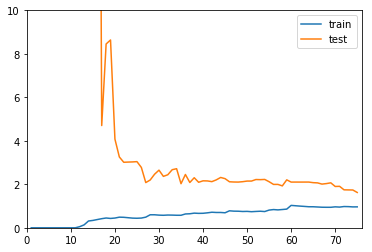

In [98]:
poly10_reg=PolynomialRegression(degree=10)
plot_learning_curve(poly10_reg,X_train,X_test,y_train,y_test)

## regularization(penalty)

48.20663497232472


[-3, 3, 0, 7]

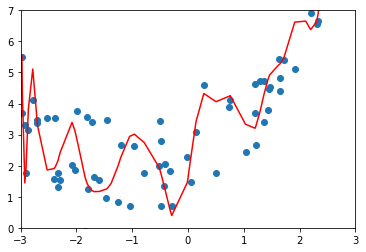

In [99]:
poly_reg=PolynomialRegression(degree=30)
poly_reg.fit(X_train,y_train)
y_predict=poly_reg.predict(X_test)
print(mean_squared_error(y_test,y_predict))
plt.scatter(X_train,y_train)
plt.plot(np.sort(X_train,axis=0),poly_reg.predict(X_train)[np.argsort(X_train,axis=0)],'r')
plt.axis([-3,3,0,7])

In [100]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [101]:
def RidgeRegression(degree,alpha):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('scalar',StandardScaler()),
        ('ridge_reg',Ridge(alpha=alpha))
    ])

1.7724779084866957


[-3, 3, 0, 7]

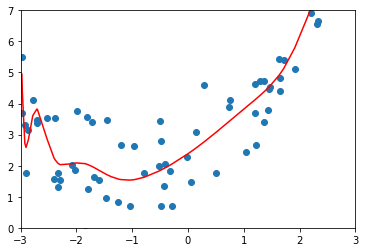

In [102]:
ridge_reg=RidgeRegression(degree=30,alpha=0.0001)
ridge_reg.fit(X_train,y_train)
y_predict=ridge_reg.predict(X_test)
print(mean_squared_error(y_test,y_predict))
plt.scatter(X_train,y_train)
plt.plot(np.sort(X_train,axis=0),ridge_reg.predict(X_train)[np.argsort(X_train,axis=0)],'r')
plt.axis([-3,3,0,7])

In [103]:
def LassoRegression(degree,alpha):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('scalar',StandardScaler()),
        ('lasso_reg',Lasso(alpha=alpha))
    ])

1.5436283313852466


[-3, 3, 0, 7]

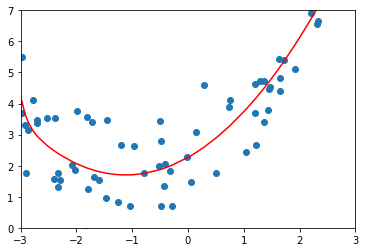

In [104]:
lasso_reg=LassoRegression(degree=30,alpha=0.01)
lasso_reg.fit(X_train,y_train)
y_predict=lasso_reg.predict(X_test)
print(mean_squared_error(y_test,y_predict))
plt.scatter(X_train,y_train)
plt.plot(np.sort(X_train,axis=0),lasso_reg.predict(X_train)[np.argsort(X_train,axis=0)],'r')
plt.axis([-3,3,0,7])